In [1]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/codestates/section1/vgames2.csv'



Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import plotly.graph_objs as go

In [3]:
#데이터 호출
game = pd.read_csv(filename)

game.rename({'Unnamed: 0':'Number'},axis=1,inplace = True)

game.shape

(16598, 10)

In [4]:
#매출 열 'M'단어 추출

game['NA_Sales'] = game['NA_Sales'].str.replace('M','')
game['EU_Sales'] = game['EU_Sales'].str.replace('M','')
game['JP_Sales'] = game['JP_Sales'].str.replace('M','')
game['Other_Sales'] = game['Other_Sales'].str.replace('M','')
game['Name']=game['Name'].str.replace('Pokémon','Pokemon')
game['Name']=game['Name'].str.replace('Lego','LEGO')


#'M'단어 추출 후 확인
game_NA1 = game[game['EU_Sales'].str.contains('M')]
game_NA1

,Number,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [5]:
#매출 열 'K'단어 포함 행 저장

a_NA = game[game['NA_Sales'].str.contains('K')]['Number']
a_EU = game[game['EU_Sales'].str.contains('K')]['Number']
a_JP = game[game['JP_Sales'].str.contains('K')]['Number']
a_Other = game[game['Other_Sales'].str.contains('K')]['Number']


In [6]:
#매출 열 'K'단어 추출
game['NA_Sales'] = game['NA_Sales'].str.replace('K','')
game['EU_Sales'] = game['EU_Sales'].str.replace('K','')
game['JP_Sales'] = game['JP_Sales'].str.replace('K','')
game['Other_Sales'] = game['Other_Sales'].str.replace('K','')

#'K'단어 추출 후 확인
game_NA2 = game[game['EU_Sales'].str.contains('K')]
game_NA2  

,Number,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [7]:
#타입변경 Object to Float

game = game.astype({'NA_Sales':'float'})
game = game.astype({'EU_Sales':'float'})
game = game.astype({'JP_Sales':'float'})
game = game.astype({'Other_Sales':'float'})

In [9]:
#단위 정리 k삭제 행 M단위로 정리
for j in a_NA-1:
     a = game.iloc[j,6]
     game.iloc[j,6] = a * 0.001

for i in a_EU-1:
     b = game.iloc[i,7]
     game.iloc[i,7] = b *0.001

for k in a_JP-1:
     c = game.iloc[k,8]
     game.iloc[k,8] = c*0.001

for m in a_Other-1:
     d = game.iloc[m,9]
     game.iloc[m,9] = d*0.001

game.head()

,Number,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [10]:
#Total_Sales 추가
game['Total_Sales']=game.iloc[:,6:10].sum(axis=1) #합계하기 전에 NA_Sales부터 Other_Sales의 data type을 float로 변경해야함

game.head()

,Number,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [11]:
#년도에 대한 데이터 전처리
for i in range(0,16598):
    a = game.iloc[i,3]
    if a < 50:
        game.iloc[i,3] = a + 2000
    elif a == 0 :
        game.iloc[i,3] = a + 2000 

    elif a > 50 and a < 100:
        game.iloc[i,3] = a+1900
    else :
        game.iloc[i,3]

In [12]:
game.isnull().sum()


Number           0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

In [13]:
#결측치 포함 행 전체 삭제
game = game.dropna(axis=0)

In [14]:
#결측치 제거 확인
game.isnull().sum()

Number         0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [15]:
#Data Frame확인
game.info
game.describe()
game.shape

(16241, 11)

In [16]:
#1지역에 따라서 선호하는 게임 장르가 다를까
genre=pd.DataFrame(game.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Total_Sales"]].sum())

genre.reset_index(level=0, inplace=True)
genrecount=pd.DataFrame(game["Genre"].value_counts())
genrecount.reset_index(level=0, inplace=True)
genrecount.rename(columns={"Genre": "Counts","index":"Genre"}, inplace=True)

genre=pd.merge(genre,genrecount,on="Genre")

In [17]:
table_data=genre[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Total_Sales"]]
table_data = table_data.rename(columns = {"NA_Sales": "N.Amer", 
                                  "EU_Sales":"Europe", 
                                  "JP_Sales": "Japan","Other_Sales":"Other","Total_Sales":"Total"})

game.head()

,Number,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [18]:
x=genre.Genre
NA_Perce=list(genre["NA_Sales"]/genre["Total_Sales"]*100)
EU_Perce=list(genre["EU_Sales"]/genre["Total_Sales"]*100)
JP_Perce=list(genre["JP_Sales"]/genre["Total_Sales"]*100)
Other_Perce=list(genre["Other_Sales"]/genre["Total_Sales"]*100)

trace1 = go.Bar(
    x=x,
    y=NA_Perce,
    name="North America" ,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75)
trace2 = go.Bar(
    x=x,
    y=EU_Perce,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='red',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Europe",
    )
trace3 = go.Bar(
    x=x,
    y=JP_Perce,
    xaxis='x2', yaxis='y2',
  
    marker=dict(
        color='orange',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Japan",
    )
trace4 = go.Bar(
    x=x,
    y=Other_Perce,
    xaxis='x2', yaxis='y2',
    
    marker=dict(
        color='purple',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Other",)

trace5=go.Table(
    columnwidth = [11,8,8,8,8,8],
  header = dict(
    values = table_data.columns,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
     height=30,
  ),
  cells = dict(
    values = [table_data.Genre,round(table_data["N.Amer"]),round(table_data["Europe"]), round(table_data["Japan"]), round(table_data["Other"]),round(table_data["Total"])],
    height=30,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left','center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

data = [trace1, trace2,trace3,trace4,trace5]
layout = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                           bgcolor='white', bordercolor='white', borderwidth=1),
                title='North America, Europe, Japan and Other  Amounts According to Genre',
                titlefont=dict(family='Courier New, monospace',size=17,color='black'),
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Genre',titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')), yaxis2=dict( domain=[0, 1],anchor='x2',title="Total Percentage",titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')),
                paper_bgcolor='white',plot_bgcolor='white',
                annotations=[ dict( text='Percentage According to Region',x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family="Courier New, monospace"),bgcolor="white",borderwidth=5),
                dict( text='Total Amounts(In Millions)',x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family='Courier New, monospace'),bgcolor="white",borderwidth=5)],
              
                  )
fig = go.Figure(data=data, layout=layout)

fig

In [19]:
#2연도별 게임의 트렌드

year_max_df = game.groupby(['Year', 'Genre']).size().reset_index(name='count')

year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop([year_max_genre.index[47], year_max_genre.index[48]])
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

year_max_genre = year_max_genre.drop(
    [
        year_max_genre.index[0],
        year_max_genre.index[1],
        year_max_genre.index[2],
        year_max_genre.index[3],
        year_max_genre.index[4],
        year_max_genre.index[5],
        year_max_genre.index[6],
        year_max_genre.index[7],
        year_max_genre.index[8],
        year_max_genre.index[9],
        year_max_genre.index[10],
        year_max_genre.index[11],
        year_max_genre.index[12]
        ]
        )

genre = year_max_genre['Genre'].values

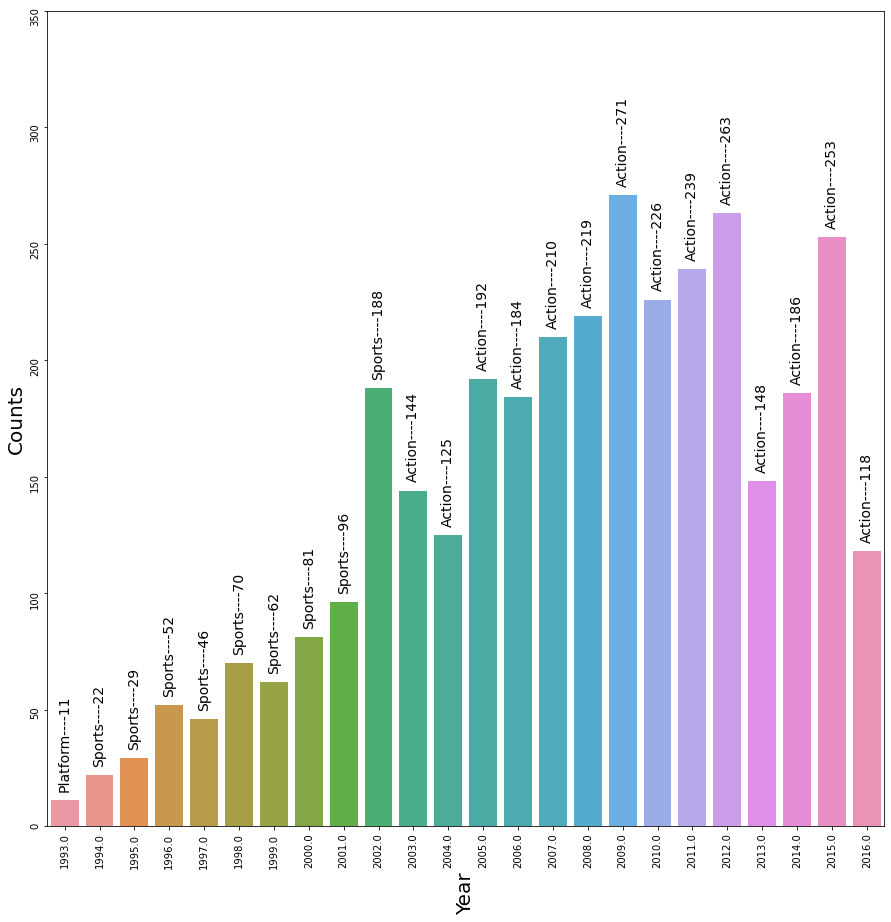

In [20]:
#년도별 최고 출고량 장르 시각화
plt.figure(figsize=(15, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)

index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.ylim(0,350)
plt.xlabel('Year',rotation=90,fontsize = 20)
plt.ylabel('Counts',fontsize = 20)

plt.rcParams['axes.facecolor'] = 'white'

plt.show()

In [21]:
year_max_df['Rank'] = year_max_df.groupby(['Year'])['count'].rank(method = 'first', ascending = False)


In [22]:
#2016년 기준 1 - 4위에 해당하는 Genre 추세 비교

a = year_max_df[year_max_df['Genre']=='Action']
b = year_max_df[year_max_df['Genre']=='Sports']
c = year_max_df[year_max_df['Genre']=='Role-Playing']
d = year_max_df[year_max_df['Genre']=='Adventure']

temp_a = pd.merge(a,b,on='Year')
temp_a1=temp_a.rename(columns = {"count_x": "Action","count_y":"Sports","Rank_x":"Action Rank","Rank_y":"Sports Rank"})
temp_a2 = temp_a1.drop(['Genre_x','Genre_y'],axis=1)

temp_b = pd.merge(c,d,on='Year')
temp_b1 =temp_b.rename(columns = {"count_x": "Role-Playing","count_y":"Adventure","Rank_x":"RolePlaying Rank","Rank_y":"Adventure Rank"})
temp_b2 = temp_b1.drop(['Genre_x','Genre_y'],axis=1)

tendency = pd.merge(temp_a2,temp_b2,on='Year')

tendency_graph = tendency.iloc[16:27 , :]
tendency_graph = tendency_graph.astype(int)

tendency_graph = tendency_graph.drop(['Action','Sports','Role-Playing','Adventure'],axis=1)

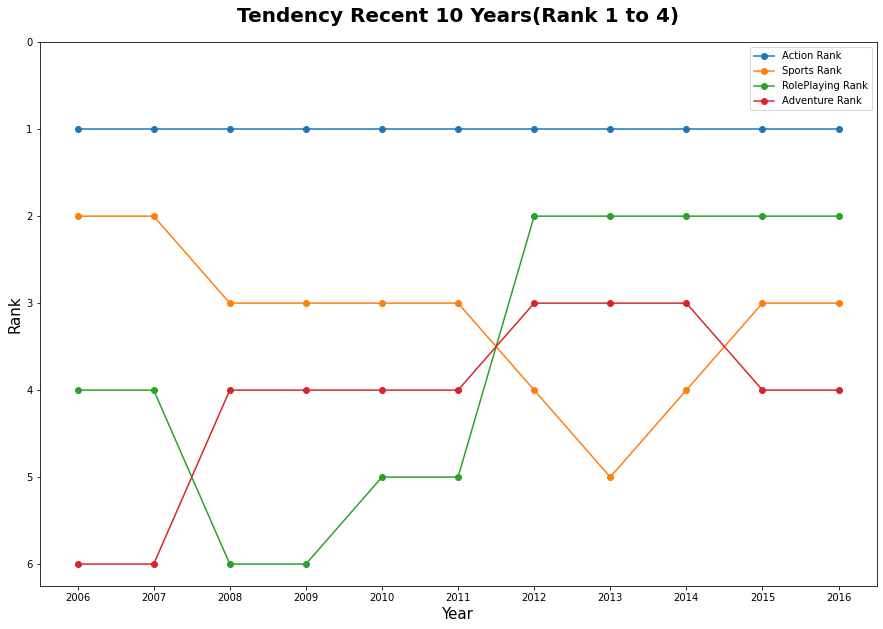

In [23]:
#Visualization
tendency_graph.set_index('Year',inplace = True)

tendency_graph = tendency_graph.transpose()
tendency_graph = tendency_graph.transpose()

tendency_graph.plot(marker = 'o',figsize = (15,10))

plt.xlabel('Year',fontsize = 15)
plt.ylabel('Rank',fontsize = 15)
plt.title('Tendency Recent 10 Years(Rank 1 to 4)',fontsize =20,fontweight='bold',pad=20)
plt.yticks(np.arange(0,7))
plt.xticks(np.arange(2006,2017))

plt.rcParams['axes.facecolor'] = 'white'

plt.gca().invert_yaxis()

In [24]:
#3 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
#정확한 이름 기준으로 출력

genre1=pd.DataFrame(game.groupby("Name")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Total_Sales"]].sum())

genre1.reset_index(level=0, inplace=True)

genrecount1=pd.DataFrame(game["Name"].value_counts())
genrecount1.reset_index(level=0, inplace=True)

In [25]:
#Action
action_1 = game[game['Name'].str.contains('LEGO') & game['Genre'].str.contains('Action')]
action_2 = game[game['Name'].str.contains('Star Wars') & game['Genre'].str.contains('Action')]
action_3 = game[game['Name'].str.contains('Harry') & game['Genre'].str.contains('Action')]
action_4 = game[game['Name'].str.contains('Spider-Man') & game['Genre'].str.contains('Action')]
action_5 = game[game['Name'].str.contains('Dynasty') & game['Genre'].str.contains('Action')]


#Sports
sport_1 = game[game['Name'].str.contains('NBA')  & game['Genre'].str.contains('Sport')]
sport_2 = game[game['Name'].str.contains('NFL')  & game['Genre'].str.contains('Sport')]
sport_3 = game[game['Name'].str.contains('FIFA')  & game['Genre'].str.contains('Sport')]
sport_4_1 = game[game['Name'].str.contains('MLB') & game['Genre'].str.contains('Sport')]
sport_4_2 = game[game['Name'].str.contains('Major League Baseball')  & game['Genre'].str.contains('Sport')]
MLB_Series = len(sport_4_1)+len(sport_4_2)
sport_5 = game[game['Name'].str.contains('NHL')  & game['Genre'].str.contains('Sport')]

#Role-Playing
role_1 = game[game['Name'].str.contains('Final Fantasy')&game['Genre'].str.contains('Role-Playing')]
role_2 = game[game['Name'].str.contains('Tales')&game['Genre'].str.contains('Role-Playing')]
role_3 = game[game['Name'].str.contains('Dragon Quest')&game['Genre'].str.contains('Role-Playing')]
role_4 = game[game['Name'].str.contains('Shin Megami')&game['Genre'].str.contains('Role-Playing')]
role_5 = game[game['Name'].str.contains('Pokemon')&game['Genre'].str.contains('Role-Playing')]

In [26]:
#ACTION, SPORTS, ROLE-PLAYING TOP 5 GAME Visulaization
#시각화 DataFrame

raw_data_name = { 'Genre' : ['Action','Action','Action','Action','Action','Sports','Sports','Sports','Sports','Sports','Role-playing','Role-playing','Role-playing','Role-playing','Role-playing'],
                 'Game Name' : ['Lego','Star Wars','Harry Potter','Spider-Man','Dynasty Warriors','NBA Series','NFL Series','FIFA','MLB Series','NHL Series','Final Fantasy','Tales Series','Dragon Quest Series','Shin Megami Series','Pokemon Series'],
             'Counts' : [len(action_1),len(action_2),len(action_3),len(action_4),len(action_5),len(sport_1),len(sport_2),len(sport_3),MLB_Series,len(sport_5),len(role_1),len(role_2),len(role_3),len(role_4),len(role_5)],
             'Rank' : ['top1','top2','top3','top4','top5','top1','top2','top3','top4','top5','top1','top2','top3','top4','top5']
}

top_game_name = pd.DataFrame(raw_data_name)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(30.616041666666675, 0.5, 'Counts')

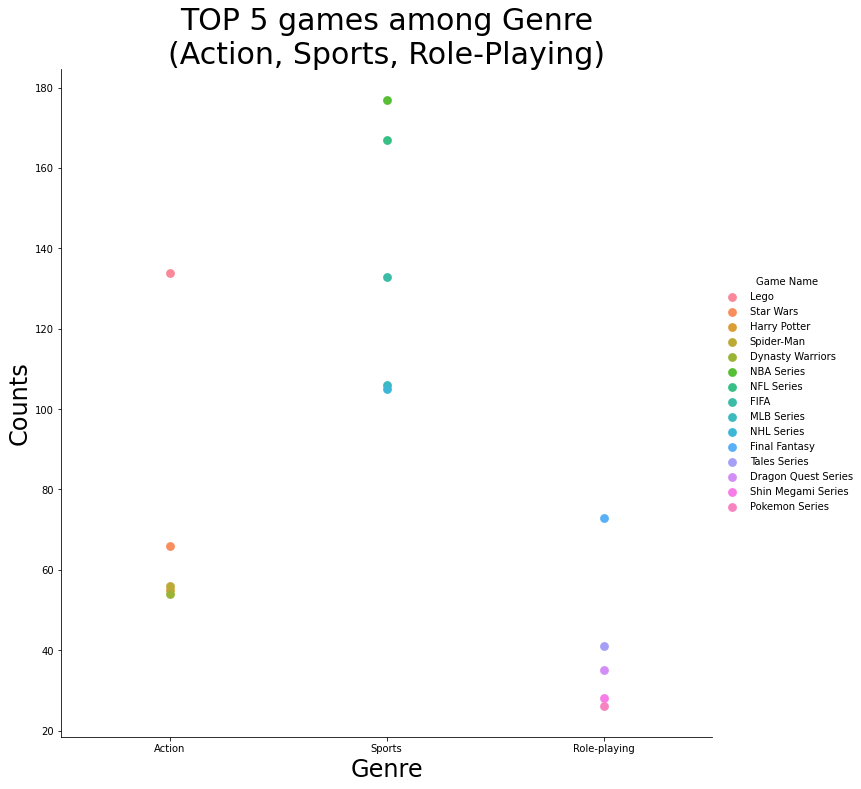

In [27]:
#Visualization

sns.factorplot(data=top_game_name,x='Genre',y='Counts',hue='Game Name',size = 10,aspect=1,linewidth=2)
sns.set(rc={'figure.figsize':(11,8.5)})

plt.title("TOP 5 games among Genre\n(Action, Sports, Role-Playing)",fontsize = 30)

plt.xlabel('Genre',fontsize =24)
plt.ylabel('Counts',fontsize =24)

In [28]:
#ACTION top Analysis
game_action = action_1.sort_values(by = 'Year', ascending = True)

game_action

action_NA = game_action['NA_Sales'].sum()
action_EU = game_action['EU_Sales'].sum()
action_JP =game_action['JP_Sales'].sum()
action_Other =game_action['Other_Sales'].sum()
action_sum =game_action['Total_Sales'].sum()

#Sport playing top Analysis

game_sports = sport_1.sort_values(by = 'Year', ascending = True)

sport_NA = game_sports['NA_Sales'].sum()
sport_EU = game_sports['EU_Sales'].sum()
sport_JP =game_sports['JP_Sales'].sum()
sport_Other =game_sports['Other_Sales'].sum()
sport_sum =game_sports['Total_Sales'].sum()

#Role playing top Analysis
game_role = role_1.sort_values(by = 'Year', ascending = True)

role_NA = game_role['NA_Sales'].sum()
role_EU = game_role['EU_Sales'].sum()
role_JP =game_role['JP_Sales'].sum()
role_Other =game_role['Other_Sales'].sum()
role_sum =game_role['Total_Sales'].sum()

In [29]:
#장르별 1등 게임에 대한 지역의 DataFrame 생성

raw_region_sale = {'Region':['NA','EU','JP','Other'],
                'Lego(Action)':[action_NA,action_EU,action_JP,action_Other],
                'NBA Series(Sports)':[sport_NA,sport_EU,sport_JP,sport_Other],
                'Final Fantasy(Role-Playing)':[role_NA,role_EU,role_JP,role_Other]
                }

region_sale = pd.DataFrame(raw_region_sale)

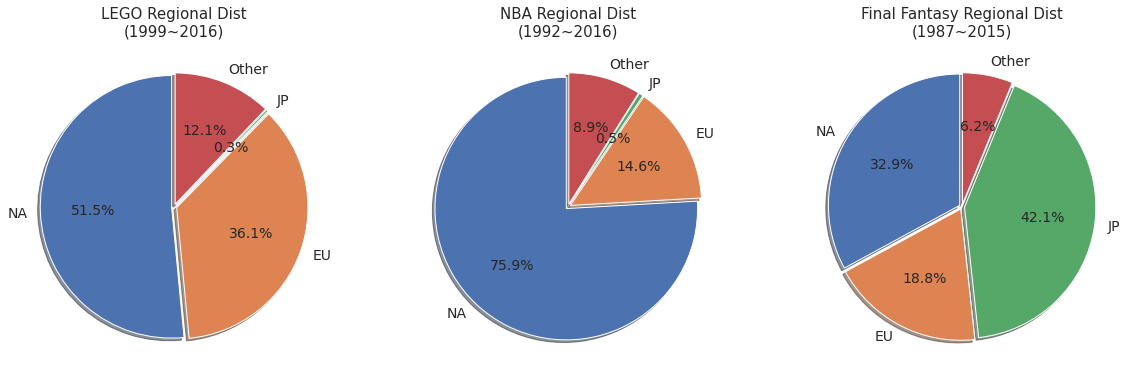

In [30]:
#Pie chart

plt.rcParams['figure.figsize'] = [20, 25]

plt.subplot(1,3,1)
plt.pie(region_sale['Lego(Action)'],labels=region_sale['Region'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02),
shadow = True,startangle=90,textprops={'fontsize': 14})
plt.title('LEGO Regional Dist\n(1999~2016)',fontsize = 15)


plt.subplot(1,3,2)
plt.pie(region_sale['NBA Series(Sports)'],labels=region_sale['Region'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02),
shadow = True,startangle=90,textprops={'fontsize': 14})
plt.title('NBA Regional Dist\n(1992~2016)',fontsize = 15)


plt.subplot(1,3,3)
plt.pie(region_sale['Final Fantasy(Role-Playing)'],labels=region_sale['Region'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02),
shadow = True,startangle=90,textprops={'fontsize': 14})
plt.title('Final Fantasy Regional Dist\n(1987~2015)',fontsize = 15)


plt.show()

In [31]:
#판매량 1위 LEGO의 연도별 /지역별 Datafrome
game_action_year = game_action.drop(['Name','Platform','Genre','Publisher'],axis=1)

a_2016 = game_action_year[game_action_year['Year']==2016.0]
a_2015 = game_action_year[game_action_year['Year']==2015.0]
a_2014 = game_action_year[game_action_year['Year']==2014.0]

data_action2014 = {'Number': 2014, 'Year' : 2014, 
                    'NA_Sales':a_2014['NA_Sales'].sum(),
                    'EU_Sales':a_2014['EU_Sales'].sum(),
                    'JP_Sales':a_2014['JP_Sales'].sum(),
                    'Other_Sales':a_2014['Other_Sales'].sum(),
                    'Total_Sales':a_2014['Total_Sales'].sum()}

game_action_year = game_action_year.append(data_action2014,ignore_index=True)

data_action2015 = {'Number': 2015, 'Year' : 2015, 
                    'NA_Sales':a_2015['NA_Sales'].sum(),
                    'EU_Sales':a_2015['EU_Sales'].sum(),
                    'JP_Sales':a_2015['JP_Sales'].sum(),
                    'Other_Sales':a_2015['Other_Sales'].sum(),
                    'Total_Sales':a_2015['Total_Sales'].sum()}

game_action_year = game_action_year.append(data_action2015,ignore_index=True)

data_action2016 = {'Number': 2016, 'Year' : 2016, 
                    'NA_Sales':a_2016['NA_Sales'].sum(),
                    'EU_Sales':a_2016['EU_Sales'].sum(),
                    'JP_Sales':a_2016['JP_Sales'].sum(),
                    'Other_Sales':a_2016['Other_Sales'].sum(),
                    'Total_Sales':a_2016['Total_Sales'].sum()}

game_action_year = game_action_year.append(data_action2016,ignore_index=True)

game_action_year = game_action_year.iloc[134:137,:]

In [32]:
#판매량 1위 NBA Series의 연도별 /지역별 Datafrome
game_sports_year = game_sports.drop(['Name','Platform','Genre','Publisher'],axis=1)

a_2016 = game_sports_year[game_sports_year['Year']==2016.0]
a_2015 = game_sports_year[game_sports_year['Year']==2015.0]
a_2014 = game_sports_year[game_sports_year['Year']==2014.0]

data_action2014 = {'Number': 2014, 'Year' : 2014, 
                    'NA_Sales':a_2014['NA_Sales'].sum(),
                    'EU_Sales':a_2014['EU_Sales'].sum(),
                    'JP_Sales':a_2014['JP_Sales'].sum(),
                    'Other_Sales':a_2014['Other_Sales'].sum(),
                    'Total_Sales':a_2014['Total_Sales'].sum()}

game_sports_year = game_sports_year.append(data_action2014,ignore_index=True)

data_action2015 = {'Number': 2015, 'Year' : 2015, 
                    'NA_Sales':a_2015['NA_Sales'].sum(),
                    'EU_Sales':a_2015['EU_Sales'].sum(),
                    'JP_Sales':a_2015['JP_Sales'].sum(),
                    'Other_Sales':a_2015['Other_Sales'].sum(),
                    'Total_Sales':a_2015['Total_Sales'].sum()}

game_sports_year = game_sports_year.append(data_action2015,ignore_index=True)

data_action2016 = {'Number': 2016, 'Year' : 2016, 
                    'NA_Sales':a_2016['NA_Sales'].sum(),
                    'EU_Sales':a_2016['EU_Sales'].sum(),
                    'JP_Sales':a_2016['JP_Sales'].sum(),
                    'Other_Sales':a_2016['Other_Sales'].sum(),
                    'Total_Sales':a_2016['Total_Sales'].sum()}

game_sports_year = game_sports_year.append(data_action2016,ignore_index=True)

game_sports_year = game_sports_year.iloc[177:180,:]

In [34]:
#판매량 1위 Final Fantasy Series의 연도별 /지역별 Datafrome
game_role_year = game_role.drop(['Name','Platform','Genre','Publisher'],axis=1)

a_2016 = game_role_year[game_role_year['Year']==2016.0]
a_2015 = game_role_year[game_role_year['Year']==2015.0]
a_2014 = game_role_year[game_role_year['Year']==2014.0]

data_action2014 = {'Number': 2014, 'Year' : 2014, 
                    'NA_Sales':a_2014['NA_Sales'].sum(),
                    'EU_Sales':a_2014['EU_Sales'].sum(),
                    'JP_Sales':a_2014['JP_Sales'].sum(),
                    'Other_Sales':a_2014['Other_Sales'].sum(),
                    'Total_Sales':a_2014['Total_Sales'].sum()}

game_role_year = game_role_year.append(data_action2014,ignore_index=True)

data_action2015 = {'Number': 2015, 'Year' : 2015, 
                    'NA_Sales':a_2015['NA_Sales'].sum(),
                    'EU_Sales':a_2015['EU_Sales'].sum(),
                    'JP_Sales':a_2015['JP_Sales'].sum(),
                    'Other_Sales':a_2015['Other_Sales'].sum(),
                    'Total_Sales':a_2015['Total_Sales'].sum()}

game_role_year = game_role_year.append(data_action2015,ignore_index=True)

data_action2016 = {'Number': 2016, 'Year' : 2016, 
                    'NA_Sales':a_2016['NA_Sales'].sum(),
                    'EU_Sales':a_2016['EU_Sales'].sum(),
                    'JP_Sales':a_2016['JP_Sales'].sum(),
                    'Other_Sales':a_2016['Other_Sales'].sum(),
                    'Total_Sales':a_2016['Total_Sales'].sum()}

game_role_year = game_role_year.append(data_action2016,ignore_index=True)
game_role_year = game_role_year.iloc[73:76,:]
game_role_year

,Number,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
73,2014.0,2014.0,0.47,0.29,0.36,0.12,1.24
74,2015.0,2015.0,0.81,0.64,0.21,0.27,1.93
75,2016.0,2016.0,0.00,0.00,0.00,0.00,0.00


In [35]:
#Visualization

recent3_action = game_action_year.drop(['Number','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
recent3_sports = game_sports_year.drop(['Number','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
recent3_role = game_role_year.drop(['Number','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)

temp_recent3 = pd.merge(recent3_action,recent3_sports,on='Year')
temp1_recent3 = pd.merge(temp_recent3,recent3_role,on='Year')
graph_recent3 = temp1_recent3.replace(0,3) # Estimation for 1.5 times
graph_recent3 = graph_recent3.rename(columns ={'Total_Sales_x':'Action(Lego)','Total_Sales_y':'Sports(NBA)','Total_Sales':'Role-Playing(Final Fantasy)'})

graph_recent3

,Year,Action(Lego),Sports(NBA),Role-Playing(Final Fantasy)
0,2014.0,12.57000,7.50,1.24
1,2015.0,7.84022,8.28,1.93
2,2016.0,3.51000,1.94,3.00


In [36]:
#Index for Graph
graph_recent3.set_index('Year',inplace = True)

graph_recent3 = graph_recent3.transpose()
graph_recent3 = graph_recent3.transpose()

Text(0.5, 1.0, 'Total Amounts of Rank 1 of each Genre : 3 Years\n(Estimated for 2016 Role-Playing)')

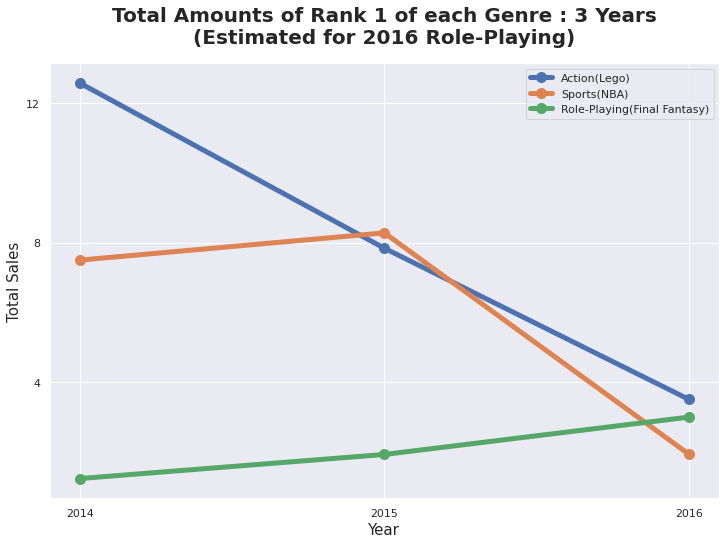

In [37]:
#Graph Visulazation

graph_recent3.plot(marker = 'o', figsize=(12,8),linewidth = 5,markersize = 10)

graph_recent3

plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize = 15)
plt.xticks([2014,2015,2016])
plt.yticks([0,4,8,12])
plt.plot(linewidth = 20)

plt.title('Total Amounts of Rank 1 of each Genre : 3 Years\n(Estimated for 2016 Role-Playing)',fontsize =20,fontweight='bold',pad=20)